## Car Selling Price Predictions

### Importing Necessary Libaries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings; warnings.filterwarnings("ignore")

### Importing the Data

In [2]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Understanding and Preprocessing

In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

### Dropping Unnecessary Columns

In [7]:
df.drop(columns = ["Car_Name","Year"],inplace = True)

### Categorical Columns

In [8]:
df["Owner"] = df["Owner"].astype("category")

In [9]:
categorical_cols = df.select_dtypes(include = "object").columns
df[categorical_cols] = df[categorical_cols].astype("category")

In [10]:
categorical_col = df.select_dtypes(include = "category").columns
continous_col = df.select_dtypes(include = ["float64","int64"]).columns
Target = df["Selling_Price"]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Selling_Price  301 non-null    float64 
 1   Present_Price  301 non-null    float64 
 2   Driven_kms     301 non-null    int64   
 3   Fuel_Type      301 non-null    category
 4   Selling_type   301 non-null    category
 5   Transmission   301 non-null    category
 6   Owner          301 non-null    category
dtypes: category(4), float64(2), int64(1)
memory usage: 8.9 KB


## Univariate Analysis - Categorical Columns

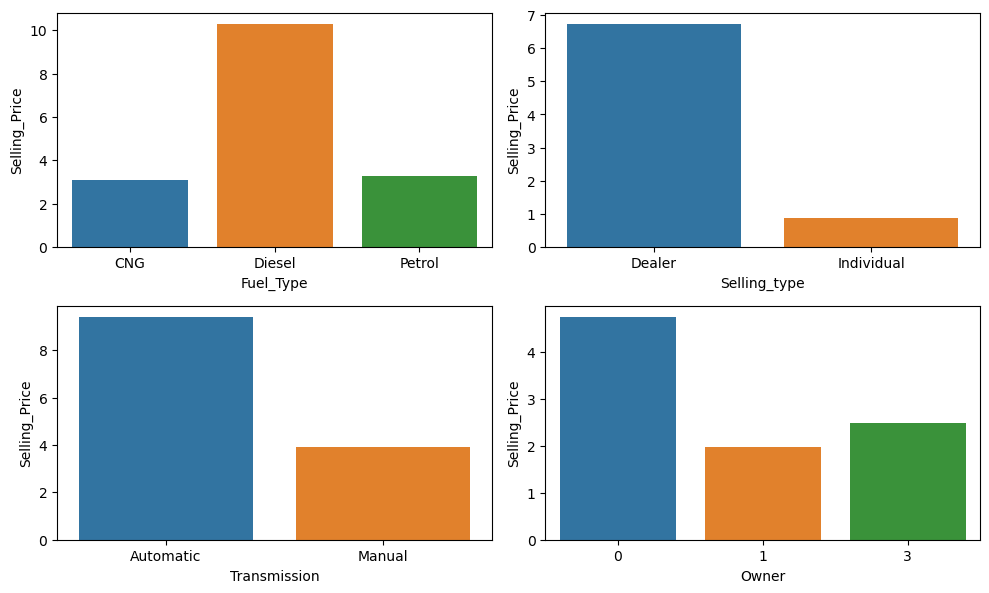

In [12]:
plt.figure(figsize =(10,6))

fignum = 0
for i in categorical_col:
    fignum = fignum + 1
    plt.subplot(2,2,fignum)
    sns.barplot(x = df[i],y = df["Selling_Price"],ci = None,data = df)

plt.tight_layout()
plt.show()

* High selling price were mostly of type Diesel, selling type as Dealer, with Transmission as Automatic and owner as 0

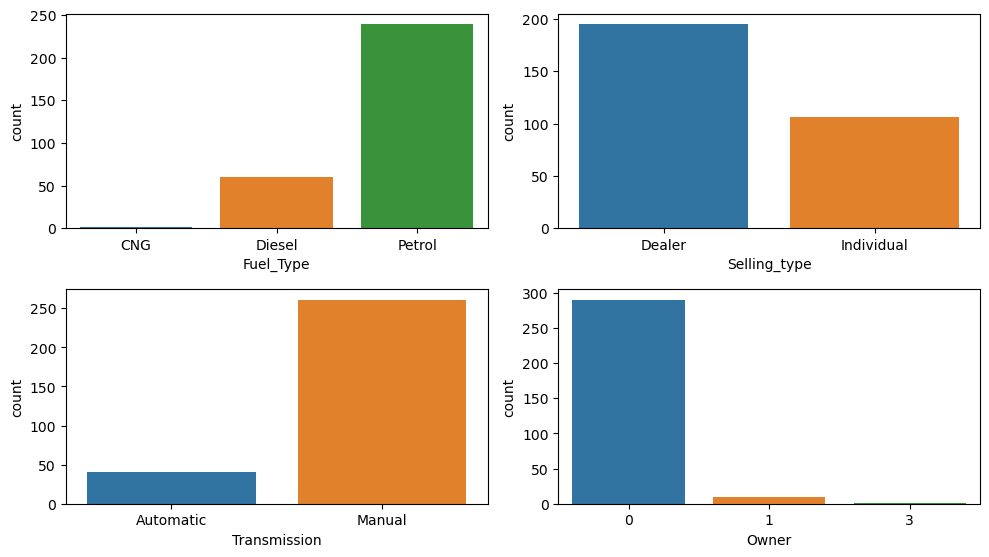

In [13]:
plt.figure(figsize =(10,8))

fignum = 0
for i in categorical_col:
    fignum = fignum + 1
    plt.subplot(3,2,fignum)
    sns.countplot(x = df[i],data = df)

plt.tight_layout()
plt.show()

* Here we can see majorly fuel_type is petrol , selling type is Dealer , Transmission is Manual and owner is of 0

## Univariate Analysis - Continous Columns

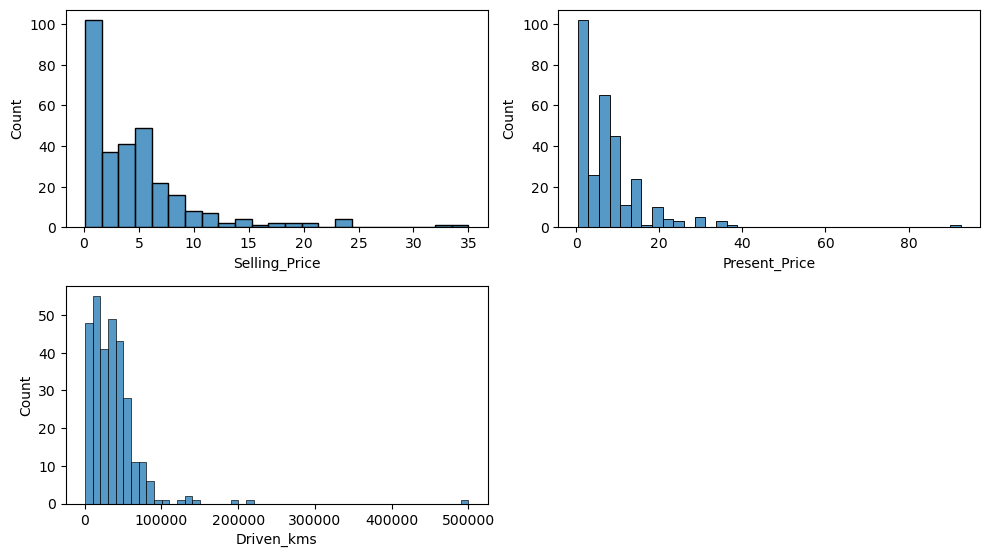

In [14]:
plt.figure(figsize =(10,8))

fignum = 0
for i in continous_col:
    fignum = fignum + 1
    plt.subplot(3,2,fignum)
    sns.histplot(x = df[i],data = df)

plt.tight_layout()
plt.show()

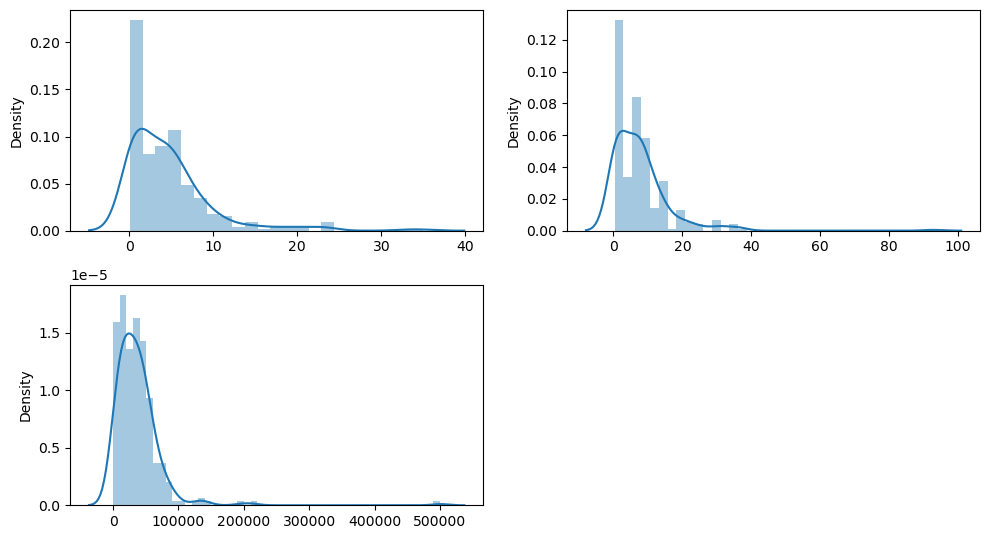

In [15]:
plt.figure(figsize =(10,8))

fignum = 0
for i in continous_col:
    fignum = fignum + 1
    plt.subplot(3,2,fignum)
    sns.distplot(x = df[i])

plt.tight_layout()
plt.show()

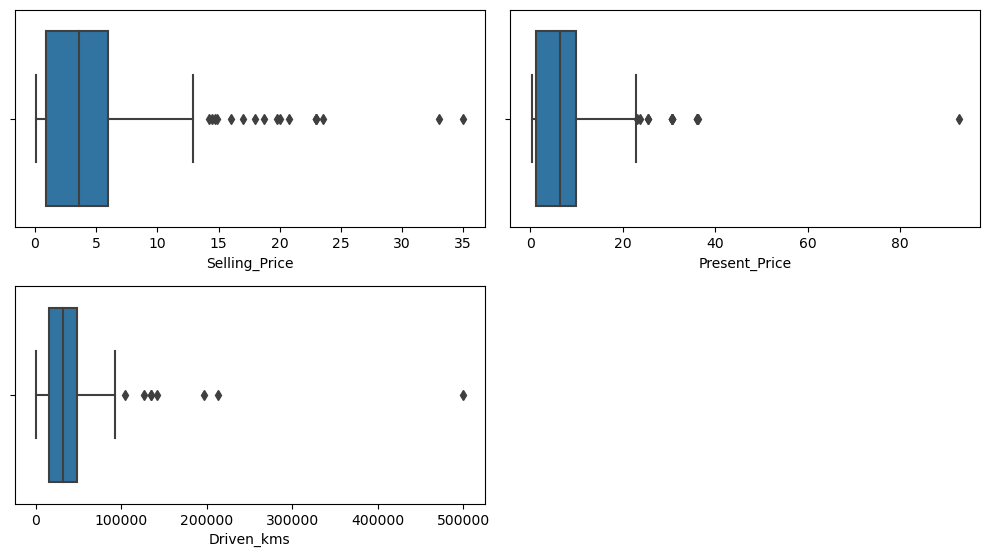

In [16]:
plt.figure(figsize =(10,8))

fignum = 0
for i in continous_col:
    fignum = fignum + 1
    plt.subplot(3,2,fignum)
    sns.boxplot(x = df[i],data = df)

plt.tight_layout()
plt.show()

### Treating Outliers

In [17]:
for i in continous_col:
    q1 =df[i].describe()["25%"]
    q3 =df[i].describe()["75%"]
    iqr = q3 - q1
    
    lower_wisker = q1 - 1.5*(iqr)
    upper_wisker = q3 + 1.5*(iqr)
    
    df[i] = np.where(df[i]> upper_wisker,upper_wisker,np.where(df[i]< lower_wisker,lower_wisker,df[i]))

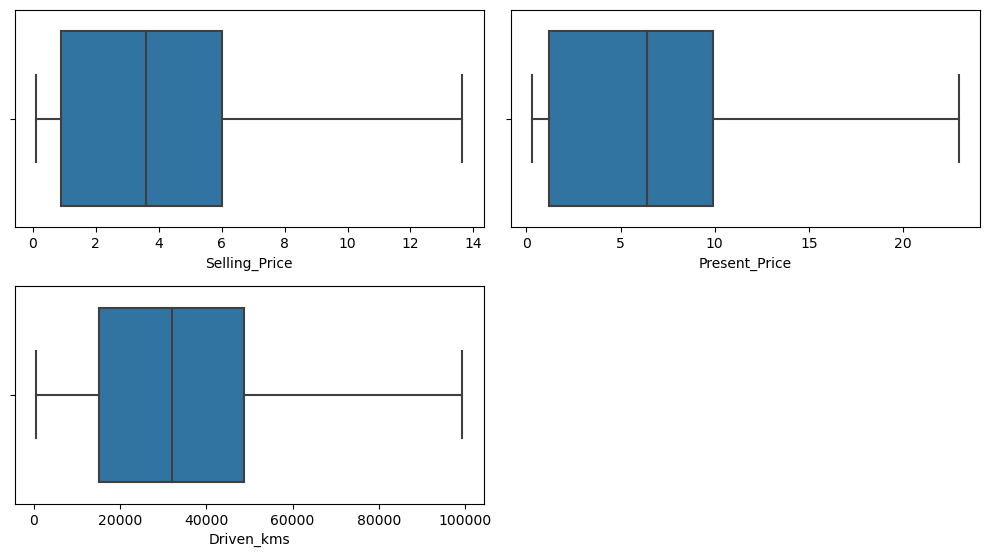

In [18]:
plt.figure(figsize =(10,8))

fignum = 0
for i in continous_col:
    fignum = fignum + 1
    plt.subplot(3,2,fignum)
    sns.boxplot(x = df[i],data = df)

plt.tight_layout()
plt.show()

### Bivariate Analysis

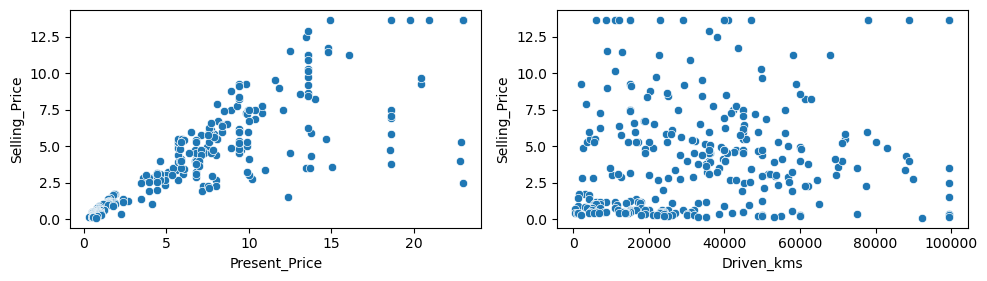

In [19]:
plt.figure(figsize =(10,8))

fignum = 0
for i in continous_col:
    if i!= "Selling_Price":
        fignum = fignum + 1
        plt.subplot(3,2,fignum)
        sns.scatterplot(x = df[i],y = df["Selling_Price"])

plt.tight_layout()
plt.show()

### Multivariate Analysis

<Axes: >

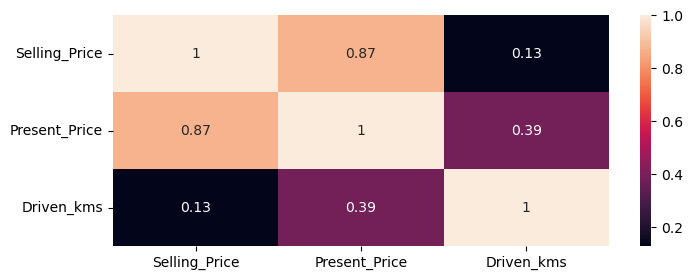

In [20]:
plt.figure(figsize = (8,3))
sns.heatmap(df.corr(),annot = True)

### Train Test Split

In [21]:
x = df.drop("Selling_Price",axis = 1)
y = df["Selling_Price"]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((240, 6), (61, 6), (240,), (61,))

### Feature Scaling

In [24]:
scaler = MinMaxScaler()
numeric_col = x_train.select_dtypes(include = ["float64","int64"]).columns
x_train[numeric_col] = scaler.fit_transform(x_train[numeric_col])
x_test[numeric_col] = scaler.transform(x_test[numeric_col])

In [25]:
x_train.shape,x_test.shape

((240, 6), (61, 6))

### One Hot Encoding

In [26]:
x_train_dummies = pd.get_dummies(data = x_train,columns = ["Fuel_Type","Selling_type","Transmission","Owner"],drop_first = True)
x_test_dummies = pd.get_dummies(data = x_test,columns = ["Fuel_Type","Selling_type","Transmission","Owner"],drop_first = True)

In [27]:
x_train_dummies.shape,x_test_dummies.shape

((240, 8), (61, 8))

### Feature Selection

In [28]:
estimator = LinearRegression()
rfe = RFE(estimator,n_features_to_select=5)
rfe = rfe.fit(x_train_dummies,y_train)
rfe.support_

array([ True,  True,  True, False,  True, False, False,  True])

In [29]:
best_feature = x_train_dummies.columns[rfe.support_]
best_feature

Index(['Present_Price', 'Driven_kms', 'Fuel_Type_Diesel',
       'Selling_type_Individual', 'Owner_3'],
      dtype='object')

In [30]:
x_train = x_train_dummies[best_feature]
x_test = x_test_dummies[best_feature]

In [31]:
x_train.shape, x_test.shape

((240, 5), (61, 5))

### Variance Inflation Factor

In [32]:
vif_data = pd.DataFrame()
vif_data["Features"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values,i) for i in range(len(x_train.columns))]
vif_data

,Features,VIF
0,Present_Price,3.068281
1,Driven_kms,3.104780
2,Fuel_Type_Diesel,1.659766
3,Selling_type_Individual,1.323377
4,Owner_3,1.051098


### Model Building

In [33]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [34]:
x_train.shape,x_test.shape

((240, 6), (61, 6))

In [35]:
st_model = sm.OLS(y_train,x_train)
st_model = st_model.fit()
print(st_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     282.8
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           4.99e-97
Time:                        09:46:37   Log-Likelihood:                -421.20
No. Observations:                 240   AIC:                             854.4
Df Residuals:                     234   BIC:                             875.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Linear Regression

In [36]:
lr_model = LinearRegression()
lr_model = lr_model.fit(x_train[["Present_Price","Driven_kms","Fuel_Type_Diesel","Selling_type_Individual","Owner_3"]],y_train)

In [37]:
print("Coefficient :",lr_model.coef_)

Coefficient : [10.90576561 -3.89022725  1.79121564 -1.0132077  -5.83848522]


In [38]:
x_train.shape,x_test.shape

((240, 6), (61, 6))

## Evaluation

In [39]:
y_pred = lr_model.predict(x_test[["Present_Price","Driven_kms","Fuel_Type_Diesel","Selling_type_Individual","Owner_3"]])

In [40]:
Testing_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
Testing_mape = np.mean(np.abs(y_test - y_pred)/y_test)*100

Testing_rmse = np.round(Testing_rmse,2)
Testing_mape = np.round(Testing_mape,2)

In [41]:
Testing_Accuracy = np.round(r2_score(y_test,y_pred)*100,2)
Testing_Accuracy 

90.74

In [42]:
print("Testing Accuracy :",Testing_Accuracy,"%")
print("Testing Rmse :",Testing_rmse)
print("Testing Mape :",Testing_mape)

Testing Accuracy : 90.74 %
Testing Rmse : 1.16
Testing Mape : 47.55
